# REopt API Benchmarking of CHP+ Additions

## Initialization

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# Read in benchmarking data to Pandas DataFrams

In [2]:
bench_5 = pd.read_csv("results_FivePercentGap.csv", index_col="file")
bench_8 = pd.read_csv("results_EightPercentGap.csv", index_col="file")
bench_const = pd.read_csv("results_FivePctGapConst.csv", index_col="file")
bench_max = pd.read_csv("results_FivePctGap400maxkw.csv", index_col="file")
bench_gap = pd.read_csv("results_FivePctGapBothTESReportGap.csv", index_col="file")
bench_const4 = pd.read_csv("results_FivePctFourItersConstFull.csv", index_col="file")
# Fixed ColdTES evaluation because above runs did not have a cooling load
bench_const3pctfixcool = pd.read_csv("results_ThreePctConstFullOneIterFixedCool.csv", index_col="file")
bench_monoconst3pct = pd.read_csv("results_ThreePctMonolithConstFullOneIter.csv", index_col="file")
bench_monoconstHalfpct = pd.read_csv("results_HalfPctMonolithConstFullOneIter.csv", index_col="file")
bench_minsizes3Pct1PctSub = pd.read_csv("results_ThreePctMinSizes1PctSubGapConst.csv", index_col="file")
bench_const1pct900secs = pd.read_csv("results_OnePct900SecsConst.csv", index_col="file")
bench_mono1pct900secsconst = pd.read_csv("results_MonoOnePct900SecsConst.csv", index_col="file")
bench_mono5pct900secs = pd.read_csv("results_MonoFivePct900Secs.csv", index_col="file")
bench_minsizes3pctconst = pd.read_csv("results_DecompMinSizesThreePct900SecsConst.csv", index_col="file")
bench_monocostcurve1pctconst = pd.read_csv("results_MonoOnePctCostCurve900SecsConst.csv", index_col="file")
bench_decompcostcurve3pctconst = pd.read_csv("results_DecompThreePctCostCurve900SecsConst.csv", index_col="file")
bench_private5pctconstc110p = pd.read_csv("results_PrivateFivePct420SecsC110PConst.csv", index_col="file")
bench_minsizesupdated3pctconst = pd.read_csv("results_DecompUpdated2MinSizesThreePct900SecsConst.csv", index_col="file")

<IPython.core.display.Javascript object>


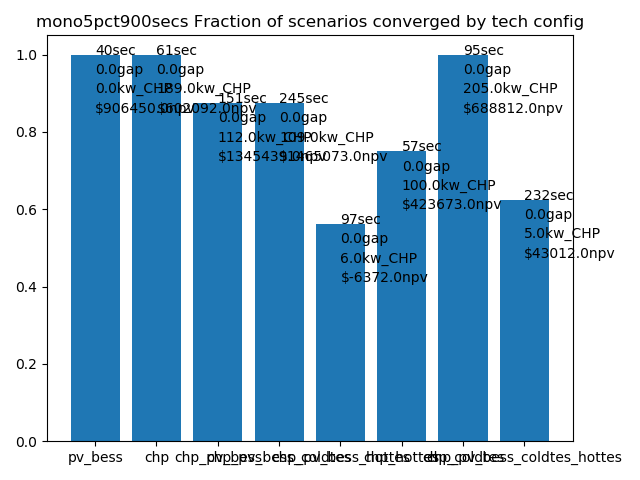

In [3]:
scenario = "mono5pct900secs"
for s in [scenario]:
    bench = copy.deepcopy(eval("bench_"+s))
    tech_configs = ['chp', 'chp_pv_bess', 'chp_pv_bess_coldtes', 'chp_pv_bess_hottes', 
                'chp_hottes', 'chp_coldtes', 'chp_pv_bess_coldtes_hottes']
    if 'pv_bess' in list(bench["tech_choice"]):
        tech_configs = ['pv_bess'] + tech_configs
    by_tech = {t: bench[bench["tech_choice"] == t] for t in tech_configs}
    num_cases = len(bench)
    avg_time = {t: np.sum(by_tech[t]['reopt_seconds'].dropna()) / len(by_tech[t]['lcc'].dropna()) for t in tech_configs}
    if 'gap' in list(bench.columns):
        avg_gap = {t: np.sum(by_tech[t]['gap'].dropna()) / len(by_tech[t]['lcc'].dropna()) for t in tech_configs}
    else:
        avg_gap = {t: 0.0 for t in tech_configs}
    avg_chp_kw = {t: np.sum(by_tech[t]['chp_kw'].dropna()) / len(by_tech[t]['lcc'].dropna()) for t in tech_configs}
    avg_npv = {t: np.sum(by_tech[t]['npv'].dropna()) / len(by_tech[t]['lcc'].dropna()) for t in tech_configs}
    plt.bar(by_tech.keys(), [len(by_tech[t]['lcc'].dropna())/len(by_tech[t]['lcc']) for t in by_tech.keys()])
    # Show average time for the ones that solved
    for t in tech_configs:
        plt.text(t, len(by_tech[t]['lcc'].dropna())/len(by_tech[t]['lcc']), str(int(avg_time[t])) + "sec", fontdict=None)
        plt.text(t, len(by_tech[t]['lcc'].dropna())/len(by_tech[t]['lcc'])-0.05, str(round(avg_gap[t],3)) + "gap", fontdict=None)
        plt.text(t, len(by_tech[t]['lcc'].dropna())/len(by_tech[t]['lcc'])-0.1, str(round(avg_chp_kw[t],0)) + "kw_CHP", fontdict=None)
        plt.text(t, len(by_tech[t]['lcc'].dropna())/len(by_tech[t]['lcc'])-0.15, "$" + str(round(avg_npv[t],0)) + "npv", fontdict=None)
    plt.title(scenario + " Fraction of scenarios converged by tech config")
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


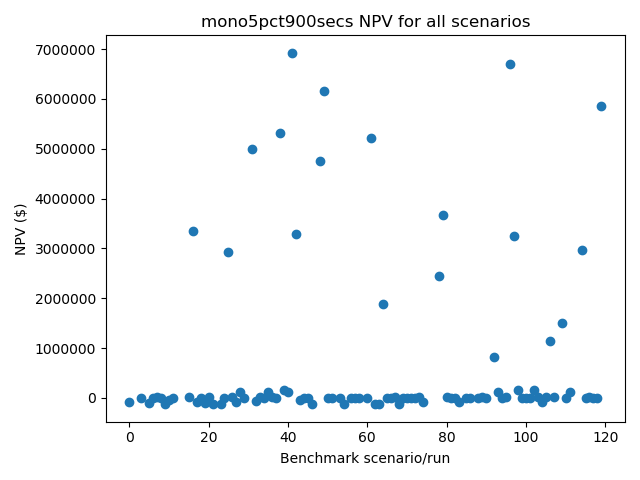

Number of negative NPV solutions =  19


In [4]:
neg_npv = bench[bench["npv"] < -0.01]
plt.scatter(range(len(bench["npv"].index)), bench["npv"])
plt.title(scenario + " NPV for all scenarios")
plt.ylabel("NPV ($)")
plt.xlabel("Benchmark scenario/run")
plt.tight_layout()
plt.show()
#print("Calc'd gap for negative NPV chp_pv_bess = ", neg_npv[neg_npv["tech_choice"]=="chp_pv_bess"]["npv"]/neg_npv[neg_npv["tech_choice"]=="chp_pv_bess"]["lcc"])
#print("Model gap output from decomp [LCC_objval - LCC_lb] = ", neg_npv[neg_npv["tech_choice"]=="chp_pv_bess"]["gap"])
print("Number of negative NPV solutions = ", len(neg_npv))

# Compare results across API versions and settings

In [5]:
# Load in all API results into a dictionary of dataframes
bench_names = ['monoconst3pct', 'mono1pct900secsconst', 'monoconstHalfpct', 'monocostcurve1pctconst',  # Constant CHP efficiencies
               'gap', 'mono5pct900secs',  # Variable CHP efficiencies
               'const3pctfixcool', 'const1pct900secs', 'decompcostcurve3pctconst',  # Decomposition, const effic
               'private5pctconstc110p'] # Private, const effic
bench_var_const = ['mono1pct900secsconst', 'mono5pct900secs']
bench_all = {api: copy.deepcopy(eval("bench_"+api)) for api in bench_names}

In [6]:
# Pick the metrics to extract from each API for all scenarios
# Format --> e.g. {"npv": df of NPV for all APIs for all scenarios, "chp_kw": def of chp_kw for all API's for all scenarios}
# TODO check if this is doing some unintended filtering of the data (e.g. no pv_bess)
metric_list = ["npv", "chp_kw", "pv_kw"]
agg_data = {metric: pd.DataFrame(index=bench_all['mono1pct900secsconst'].index) for metric in metric_list}
for metric in metric_list:
    for bench_name, bench_data_df in bench_all.items():
        agg_data[metric] = agg_data[metric].join(pd.Series(bench_data_df[metric], name=bench_name))

In [7]:
# Further filter on API's to compare against (values expected to be same if life was perfect), e.g. same set of inputs but different API settings or versions
tech_config = "chp_pv_bess"
chp_effic = "variable"
bench_const = [name for name in bench_names if "const" in name if "curve" not in name]
bench_var = [name for name in bench_names if "const" not in name if "curve" not in name]

In [25]:
# NPV
const_npv = copy.deepcopy(agg_data["npv"].loc[:,bench_const])
const_npv = const_npv.filter(regex=tech_config+"_San", axis='index')
const_npv_positive = const_npv[const_npv > 0]#.dropna(how='all')
var_const_npv = copy.deepcopy(agg_data["npv"].loc[:,bench_var_const])
# var_const_npv_chp = var_const_npv.filter(regex="chp_San", axis='index')
# var_const_npv_chp_pv_bess = var_const_npv.filter(regex="chp_pv_bess_San", axis='index')
# var_const_npv = pd.concat([var_const_npv_chp, var_const_npv_chp_pv_bess]) 
var_const_npv_positive = var_const_npv[var_const_npv > 0].dropna(how='all')
var_effic_fixed_chp_size_1pct_npv = copy.deepcopy(var_effic_fixed_chp_size_1pct_summary_df["npv"])

# CHP size
const_chp_kw = copy.deepcopy(agg_data["chp_kw"].loc[:,bench_const])
const_chp_kw = const_chp_kw.filter(regex=tech_config+"_San", axis='index')
#const_chp_kw = const_chp_kw[const_chp_kw > 50000].dropna(how='all')
var_const_chp_kw = copy.deepcopy(agg_data["chp_kw"].loc[:,bench_var_const])
var_const_chp_kw = var_const_chp_kw.filter(regex=tech_config+"_San", axis='index')

# PV size
const_pv_kw = copy.deepcopy(agg_data["pv_kw"].loc[:,bench_const])
const_pv_kw = const_pv_kw.filter(regex=tech_config+"_San", axis='index')
var_const_pv_kw = copy.deepcopy(agg_data["pv_kw"].loc[:,bench_var_const])
var_const_pv_kw = var_const_pv_kw.filter(regex=tech_config+"_San", axis='index')

In [26]:
var_const_npv_positive

,mono1pct900secsconst,mono5pct900secs
file,,
chp_coldtes_SanFrancisco_Hospital_5e1676e95457a3f87673e3b0_9_0.json,2187026.0,1883752.0
chp_pv_bess_hottes_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_13_0.json,6271728.0,NaN
chp_pv_bess_coldtes_SanFrancisco_Hospital_5e7cc9135457a338417d5622_13_0.json,111236.0,111236.0
chp_pv_bess_coldtes_hottes_SanFrancisco_Hospital_5ec2a6945457a3e60d81625c_13_0.json,23121.0,23121.0
pv_bess_SanFrancisco_Hospital_539f74f4ec4f024411ed0e5b__0.json,6116.0,6116.0
chp_pv_bess_SanFrancisco_Hospital_539f6b62ec4f024411ec9bcb_13_0.json,14421.0,19742.0
chp_pv_bess_coldtes_hottes_SanFrancisco_Hospital_539f6b62ec4f024411ec9bcb_9_0.json,166856.0,163655.0
chp_pv_bess_SanFrancisco_Hospital_5e1676e95457a3f87673e3b0_9_0.json,3655662.0,3346203.0
pv_bess_SanFrancisco_Hospital_5e1676e95457a3f87673e3b0__0.json,2437043.0,2437043.0


'chp_pv_bess_coldtes_5d094abf5457a3ba43474943_9_0'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


<IPython.core.display.Javascript object>


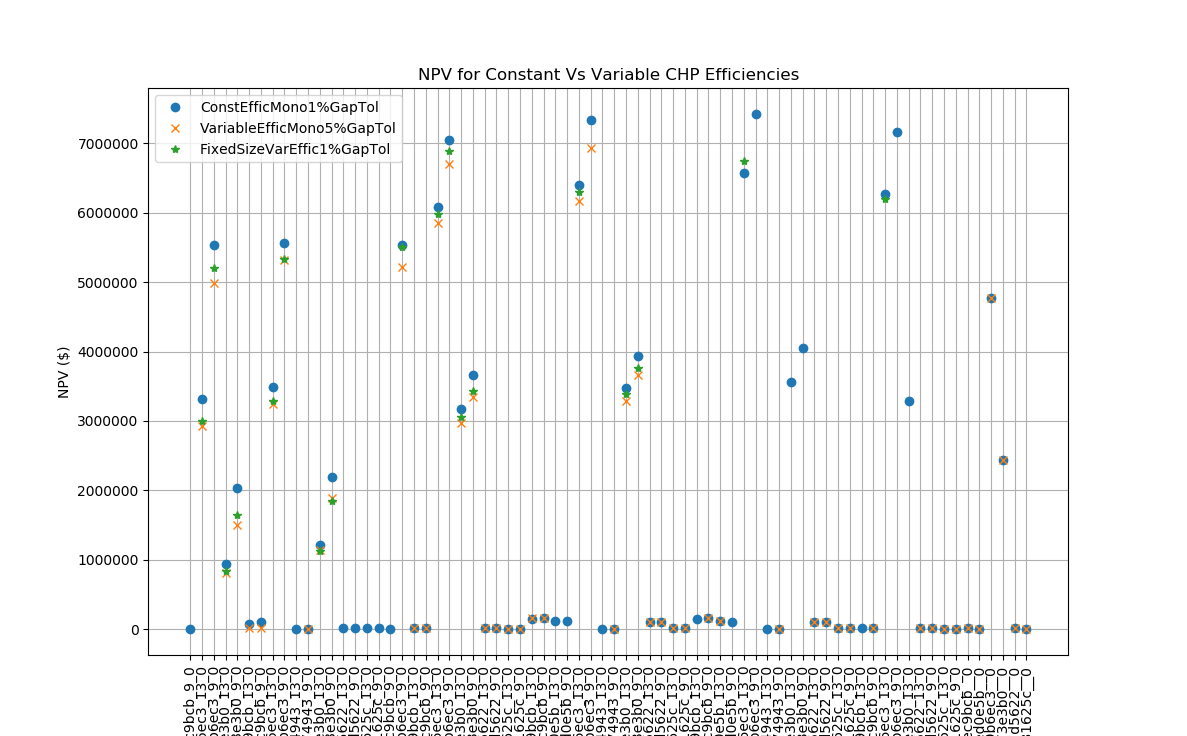

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


In [42]:
# Remove redundant text in scenario name to clean up the labels to compare differences
rm_list = ["SanFrancisco_Hospital_", ".json"]
for rm in rm_list:
    var_const_npv_positive.index = [name.replace(rm,"") for name in var_const_npv_positive.index.values]
    # Fixed CHP size for var effic case with constant efficiency size
    var_effic_fixed_chp_size_1pct_npv.index = [name.replace(rm,"") for name in var_effic_fixed_chp_size_1pct_npv.index.values]

all_data_plot = pd.concat([var_const_npv_positive, var_effic_fixed_chp_size_1pct_npv], axis=1).dropna(how="all")
    
markers = ["o","x","*","1","^","+","*"]
legend_label = ["ConstEfficMono1%GapTol", "VariableEfficMono5%GapTol", "FixedSizeVarEffic1%GapTol"]
for i, col in enumerate(all_data_plot.columns):
    plt.plot(all_data_plot[col], label=legend_label[i], linewidth=0, marker=markers[i])
# plt.plot(var_effic_fixed_chp_size_1pct_npv, label=legend_label[i+1], linewidth=0, marker=markers[i+1])
plt.grid()
plt.legend(loc="upper left")
plt.ylabel("NPV ($)")
plt.xlabel("Scenario")
plt.xticks(rotation='vertical')
plt.title("NPV for Constant Vs Variable CHP Efficiencies")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


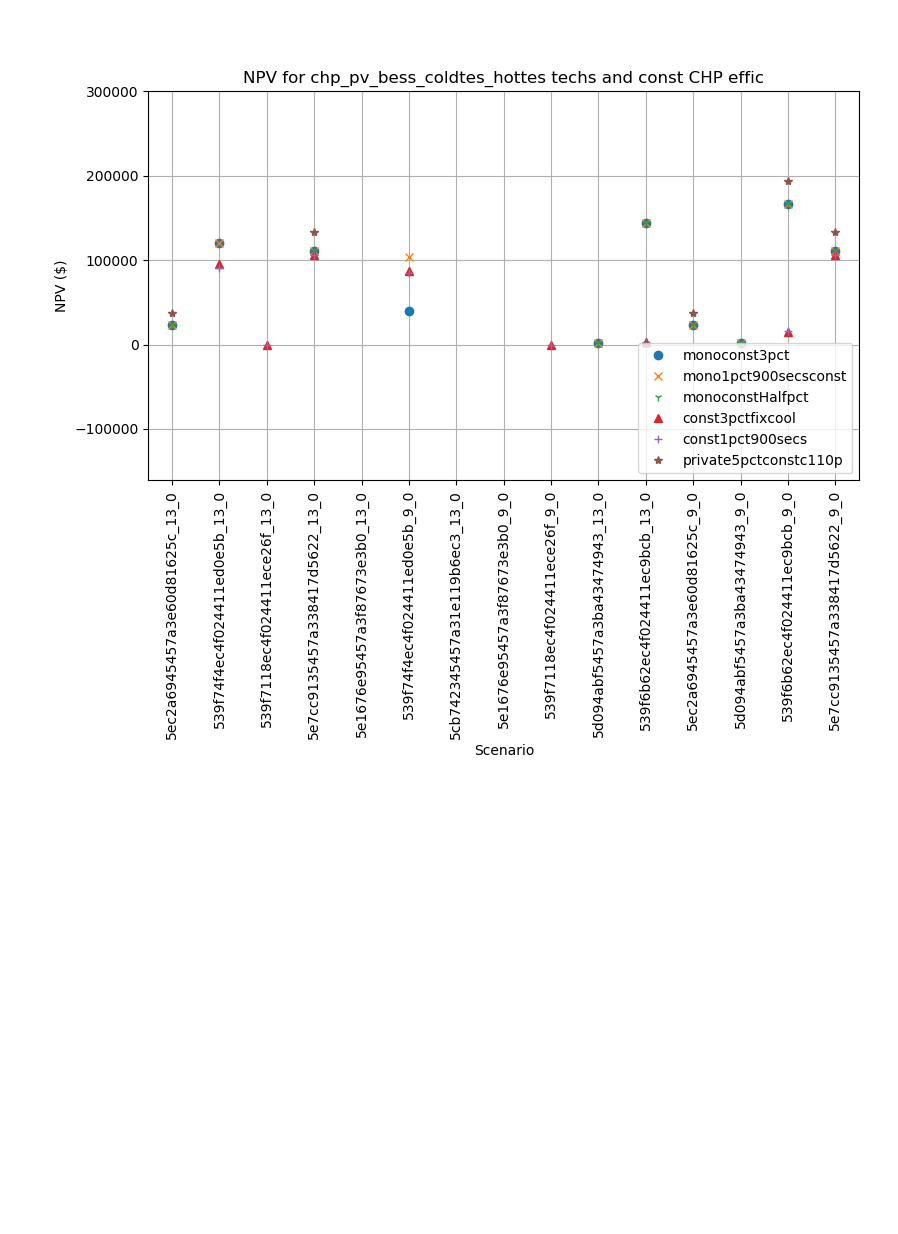

In [30]:
# Remove redundant text in scenario name to clean up the labels to compare differences
rm_list = [tech_config + "_SanFrancisco_Hospital_", ".json"]
for rm in rm_list:
    const_npv_positive.index = [name.replace(rm,"") for name in const_npv_positive.index.values]

markers = ["o","x","1","^","+","*"]    
for i, col in enumerate(const_npv_positive.columns):
    plt.plot(const_npv_positive[col], label=col, linewidth=0, marker=markers[i])
plt.grid()
plt.legend(const_npv_positive.columns)
plt.ylabel("NPV ($)")
plt.xlabel("Scenario")
plt.xticks(rotation='vertical')
plt.title("NPV for " + tech_config + " techs and " + chp_effic + " CHP effic")
plt.tight_layout()

<IPython.core.display.Javascript object>


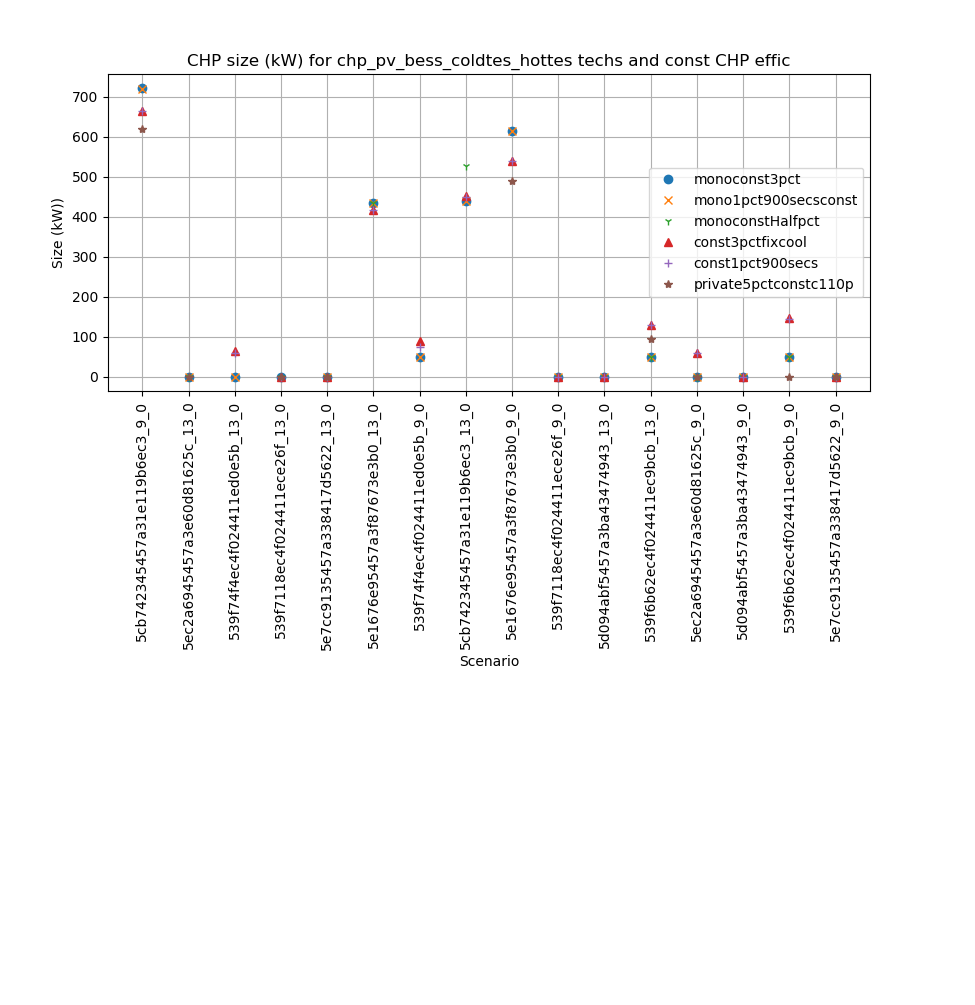

In [31]:
for rm in rm_list:
    const_chp_kw.index = [name.replace(rm,"") for name in const_chp_kw.index.values]

#fig, ax = plt.subplots()
for i, col in enumerate(const_chp_kw.columns):
    plt.plot(const_chp_kw[col], label=col, linewidth=0, marker=markers[i])
plt.grid()
plt.legend(loc="center right")
plt.ylabel("Size (kW))")
plt.xlabel("Scenario")
plt.xticks(rotation='vertical')
plt.title("CHP size (kW) for " + tech_config + " techs and " + chp_effic + " CHP effic")
plt.tight_layout()

<IPython.core.display.Javascript object>


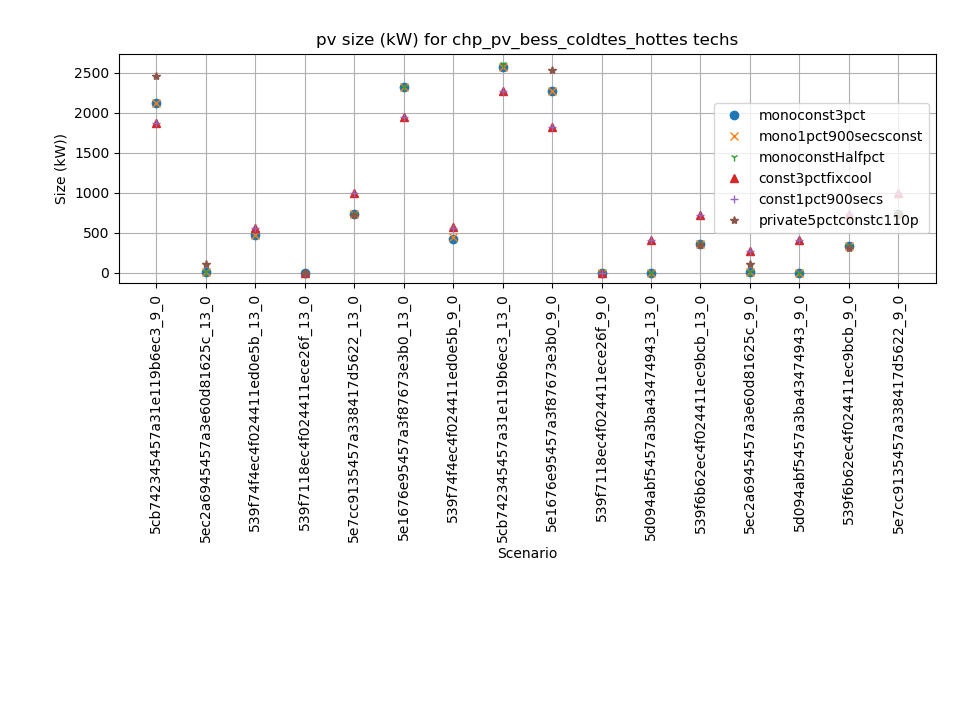

In [22]:
for rm in rm_list:
    const_pv_kw.index = [name.replace(rm,"") for name in const_pv_kw.index.values]

#fig, ax = plt.subplots()
for i, col in enumerate(const_pv_kw.columns):
    plt.plot(const_pv_kw[col], label=col, linewidth=0, marker=markers[i])
plt.grid()
plt.legend(loc="center right")
plt.ylabel("Size (kW))")
plt.xlabel("Scenario")
plt.xticks(rotation='vertical')
plt.title("pv size (kW) for " + tech_config + " techs")
plt.tight_layout()

In [9]:
import os
import json
file_dir = r"C:\Bill\AMO_Local\API Benchmarking\Variable Vs Constant CHP Efficiencies\All run data"
all_data = {}
subfolders = [f.name for f in os.scandir(file_dir) if f.is_dir()]
subfolders_path = [f.path for f in os.scandir(file_dir) if f.is_dir()]
for i, sub_path in enumerate(subfolders_path):
    all_data[subfolders[i]] = {}
    for filename in os.listdir(sub_path):
        if filename.endswith(".csv"):
            all_data[subfolders[i]]["summary"] = pd.read_csv(os.path.join(sub_path, filename))
        elif filename.endswith(".json"): 
            all_data[subfolders[i]][filename] = json.loads(eval(open(os.path.join(sub_path, filename)).read()))

In [10]:
chp_sized_data = {}
chp_size_threshold = 101.0
for i, case in enumerate(subfolders):
    chp_sized_data[case] = {}
    chp_sized_data[case]["chp_sized"] = all_data[case]["summary"][all_data[case]["summary"]["chp_kw"] >= chp_size_threshold] 

In [11]:
chp_sized_data.keys()

dict_keys(['MonoFivePct900Secs', 'MonoOnePct900SecsConst'])

In [ ]:
# DONE ALREADY, DON'T REDO
response_dict = {}
for file in chp_sized_data['MonoOnePct900SecsConst']["chp_sized"]["file"]:
    response_dict[file] = all_data['MonoOnePct900SecsConst'][file]
    with open(os.path.join(file_dir,"mono_chp_sized_posts", file), "w") as outfile:
        json.dump(response_dict[file], outfile)

In [ ]:
# DON'T RUN, JUST FOR INFORMATION OF POST USED TO DO ANALYSIS
chp_fixed_size_post = {}
for name, post in chp_sized_response.items():
    chp_fixed_size_post[name] = post['inputs'].copy()
    chp_fixed_size_post[name]["Scenario"]["timeout_seconds"] = 300
    chp_fixed_size_post[name]["Scenario"]["optimality_tolerance_techs"] = 0.01
    chp_size = post["outputs"]["Scenario"]["Site"]["CHP"]["size_kw"]
    chp_fixed_size_post[name]["Scenario"]["Site"]["CHP"]["min_kw"] = chp_size
    chp_fixed_size_post[name]["Scenario"]["Site"]["CHP"]["max_kw"] = chp_size
    chp_fixed_size_post[name]["Scenario"]["Site"]["CHP"]["elec_effic_full_load"] = 0.32
    chp_fixed_size_post[name]["Scenario"]["Site"]["CHP"]["elec_effic_half_load"] = 0.28845
    chp_fixed_size_post[name]["Scenario"]["Site"]["CHP"]["thermal_effic_full_load"] = 0.4925
    chp_fixed_size_post[name]["Scenario"]["Site"]["CHP"]["thermal_effic_half_load"] = 0.51573

In [14]:
results_dir = r"C:\Bill\AMO_Local\API Benchmarking\Variable Vs Constant CHP Efficiencies\var_effic_fixed_size_response"
var_effic_fixed_chp_size_1pct = {}
for filename in os.listdir(results_dir):
    var_effic_fixed_chp_size_1pct[filename] = json.loads(open(os.path.join(results_dir, filename)).read())

In [15]:
var_effic_fixed_chp_size_1pct_summary = {"npv": {},"chp_fuel_mmbtu": {}, "chp_elec_kwh": {}, "chp_thermal_mmbtu": {}}
for case, data, in var_effic_fixed_chp_size_1pct.items():
    var_effic_fixed_chp_size_1pct_summary["npv"][case] = data["outputs"]["Scenario"]["Site"]["Financial"]["npv_us_dollars"]
    var_effic_fixed_chp_size_1pct_summary["chp_fuel_mmbtu"][case] = data["outputs"]["Scenario"]["Site"]["CHP"]["year_one_fuel_used_mmbtu"]
    var_effic_fixed_chp_size_1pct_summary["chp_elec_kwh"][case] = data["outputs"]["Scenario"]["Site"]["CHP"]["year_one_electric_energy_produced_kwh"]
    var_effic_fixed_chp_size_1pct_summary["chp_thermal_mmbtu"][case] = data["outputs"]["Scenario"]["Site"]["CHP"]["year_one_thermal_energy_produced_mmbtu"]
list_cases = list(var_effic_fixed_chp_size_1pct_summary.keys())

var_effic_fixed_chp_size_1pct_summary_df = pd.DataFrame(var_effic_fixed_chp_size_1pct_summary)

In [16]:
var_effic_fixed_chp_size_1pct_summary_df

,npv,chp_fuel_mmbtu,chp_elec_kwh,chp_thermal_mmbtu
chp_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_13_0.json,2996437.0,47536.750,4267237.903,6904.880
chp_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_9_0.json,5197150.0,80554.595,7223583.894,9793.853
chp_SanFrancisco_Hospital_5e1676e95457a3f87673e3b0_13_0.json,833119.0,20589.144,1813014.792,7855.591
chp_SanFrancisco_Hospital_5e1676e95457a3f87673e3b0_9_0.json,1649192.0,76460.429,6795391.949,9793.853
chp_coldtes_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_13_0.json,3286880.0,40302.253,3651551.820,6902.103
chp_coldtes_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_9_0.json,5334824.0,78976.462,7118239.177,9793.853
chp_coldtes_SanFrancisco_Hospital_5e1676e95457a3f87673e3b0_13_0.json,1121928.0,23059.925,2050138.684,9451.746
chp_coldtes_SanFrancisco_Hospital_5e1676e95457a3f87673e3b0_9_0.json,1853625.0,77288.314,6931916.235,9793.853
chp_hottes_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_9_0.json,5510471.0,77303.206,7223553.698,9793.853
chp_pv_bess_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_13_0.json,5985293.0,27252.674,2468072.728,8781.580


# Compare the inputs of two models/files/dictionaries

In [ ]:
# Load in .json files for two different models
root_dir = r"C:\Bill\Projects\AMO"
compare = ["PrivateFivePct420SecsC110PConst", "MonoOnePct900SecsConst"]
case = "chp_pv_bess_coldtes_hottes_SanFrancisco_Hospital_5cb742345457a31e119b6ec3_9_0"
files = [os.path.join(root_dir, model, case) + ".json" for model in compare]
data = {}
for i, file in enumerate(files):
    try:
        data[compare[i]] = json.loads(eval(open(file).read()))
    except:
        data[compare[i]] = json.loads(open(file).read())

In [ ]:
# Must pip install deepdiff which recursively checks nested dictionary differences
import deepdiff
diff = {}
for check in ["CHP", "Financial", "HotTES","ColdTES","PV","Storage"]:
    pre = "['inputs']['Scenario']['Site']"
#     diff[check] = deepdiff.DeepDiff(eval("data[compare[0]]"+pre+"["+check+"]"), 
#                                     eval("data[compare[1]]"+pre+"["+check+"]"))
    diff[check] = deepdiff.DeepDiff(data[compare[0]]['inputs']['Scenario']['Site'][check], 
                                    data[compare[1]]['inputs']['Scenario']['Site'][check])
    print(check+ " diff = ", diff[check])